# NBA Player Valuation Project

### Importing all required libraries

In [ ]:
#Loading Libaries
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

import xgboost as xgb

RANDOM_STATE = 2025  # Shared random seed for reproducibility across models.

### Connecting to the dataset

In [ ]:
# Load dataset
file_path = "D:\\Users\\oloya\\Desktop\\University of Alberta\\NBA Player Stats and Salaries_2010-2025.csv"  # change path if needed
df = pd.read_csv(file_path)

# Quick peek
print("Shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
display(df.head(50))


Shape (rows, columns): (7298, 31)

First 5 rows:


,Player,Salary,Year,Pos,Age,Team,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kobe Bryant,23034375,2010,SG,31,LAL,73,73,38.8,9.8,...,0.811,1.1,4.3,5.4,5.0,1.5,0.3,3.2,2.6,27.0
1,Jermaine O'Neal,23016000,2010,C,31,MIA,70,70,28.4,5.6,...,0.720,1.8,5.2,6.9,1.3,0.4,1.4,1.8,3.0,13.6
2,Tracy McGrady,22843124,2010,SG,30,NYK,30,24,22.4,3.0,...,0.746,0.7,2.4,3.1,3.3,0.5,0.5,1.5,1.3,8.2
3,Tim Duncan,22183220,2010,C,33,SAS,78,77,31.3,7.2,...,0.725,2.8,7.3,10.1,3.2,0.6,1.5,1.8,1.9,17.9
4,Shaquille O'Neal,21000000,2010,C,37,CLE,53,53,23.4,4.9,...,0.496,1.8,4.9,6.7,1.5,0.3,1.2,2.0,3.2,12.0
5,Dirk Nowitzki,19795714,2010,PF,31,DAL,81,80,37.5,8.9,...,0.915,1.0,6.7,7.7,2.7,0.9,1.0,1.8,2.6,25.0
6,Paul Pierce,19795712,2010,SF,32,BOS,71,71,34.0,5.8,...,0.852,0.5,3.8,4.4,3.1,1.2,0.4,2.3,2.8,18.3
7,Ray Allen,18776860,2010,SG,34,BOS,80,80,35.2,5.8,...,0.913,0.6,2.6,3.2,2.6,0.8,0.3,1.6,2.3,16.3
8,Rashard Lewis,18010791,2010,PF,30,ORL,72,72,32.9,4.9,...,0.806,0.9,3.6,4.4,1.5,1.1,0.4,1.5,2.5,14.1
9,Michael Redd,17040000,2010,SG,30,MIL,18,12,27.3,4.2,...,0.712,0.6,2.4,3.0,2.2,1.1,0.1,0.8,1.3,11.9


In [ ]:

print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Player', 'Salary', 'Year', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


# Exploratory Data Analysis

In [ ]:
df.isna().sum().sort_values(ascending=False)


3P%       585
FT%       202
2P%        45
FG%        20
eFG%       20
Pos         0
Player      0
G           0
Team        0
GS          0
MP          0
FGA         0
Age         0
Salary      0
Year        0
3PA         0
3P          0
FG          0
2PA         0
2P          0
FT          0
FTA         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

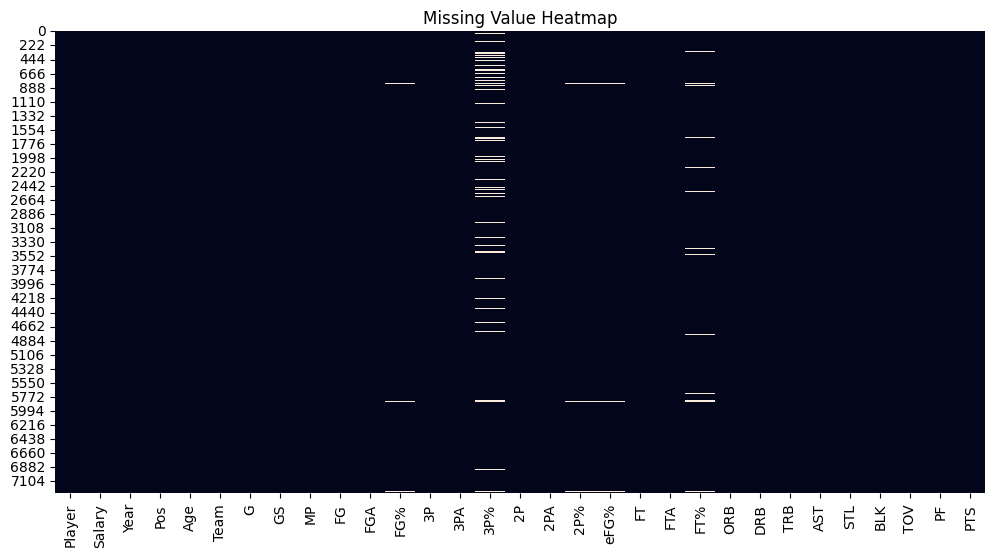

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


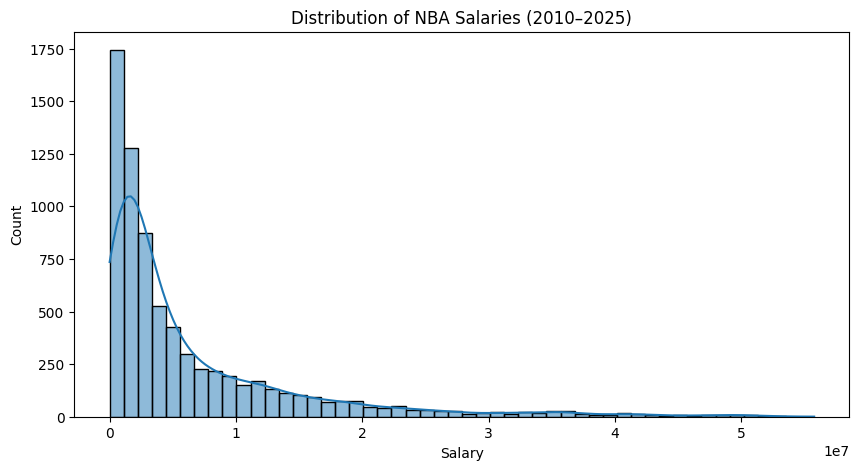

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["Salary"], bins=50, kde=True)
plt.title("Distribution of NBA Salaries (2010–2025)")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


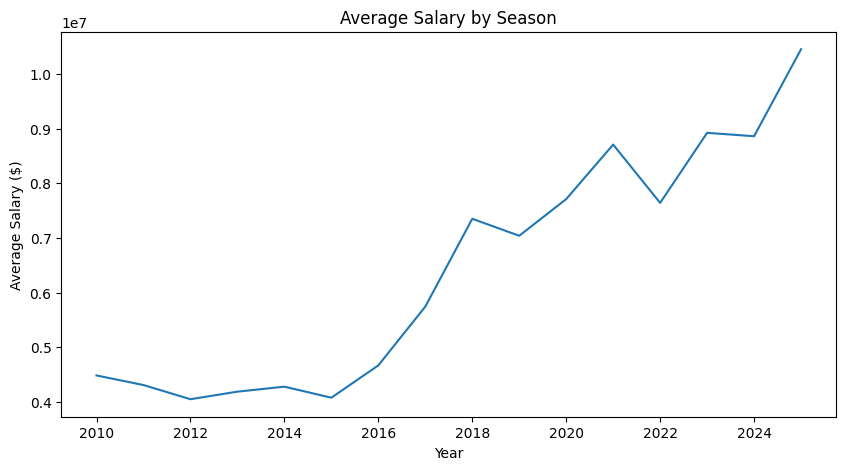

In [ ]:
salary_year = df.groupby("Year")["Salary"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=salary_year.index, y=salary_year.values)
plt.title("Average Salary by Season")
plt.ylabel("Average Salary ($)")
plt.show()


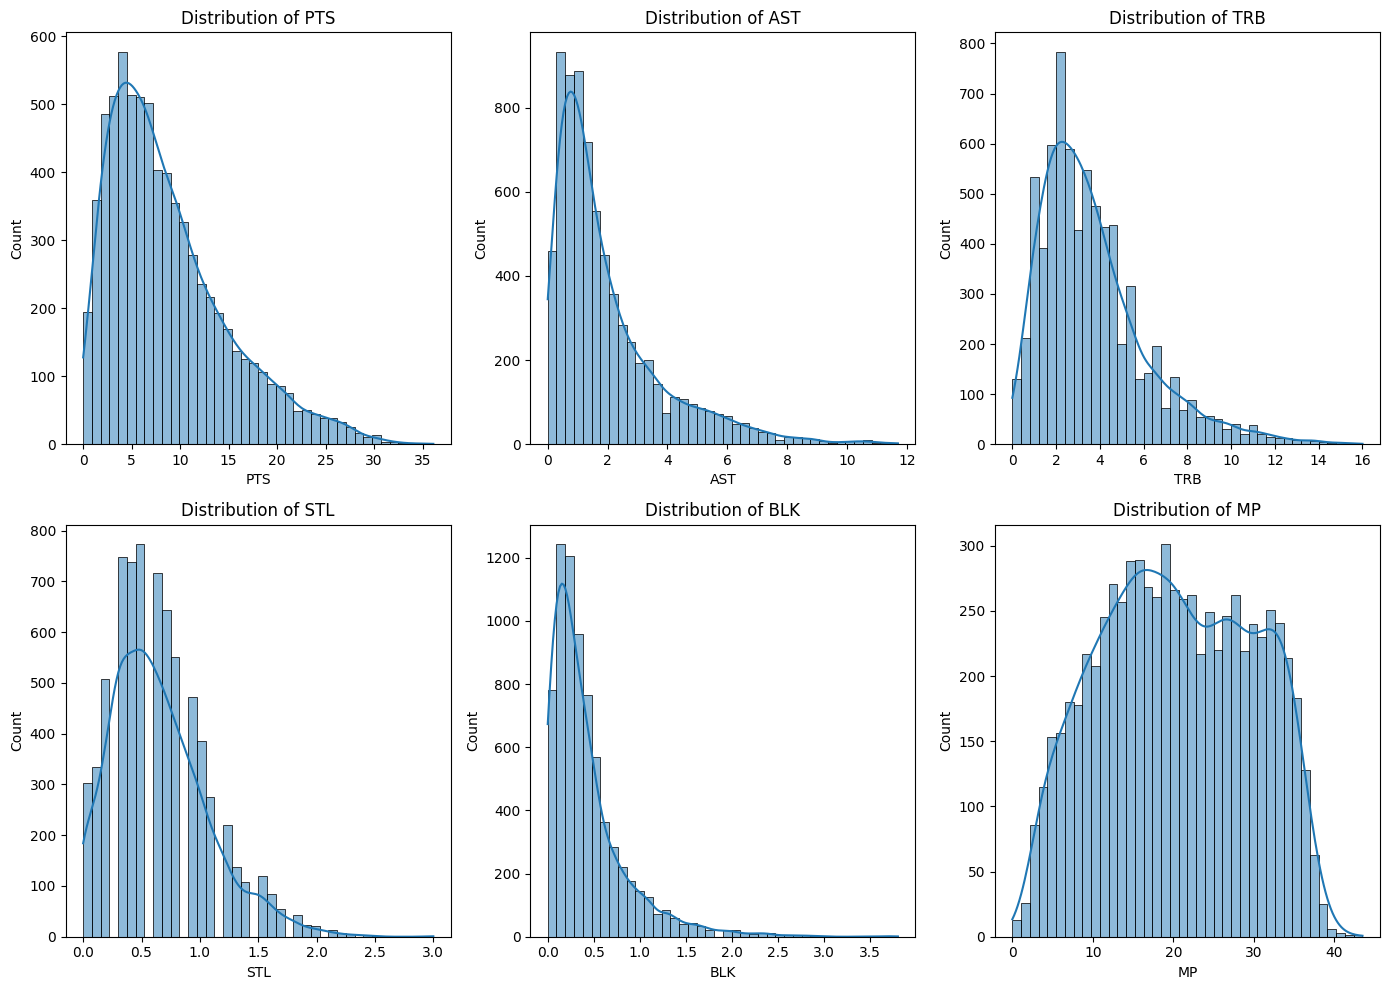

In [ ]:
stats = ["PTS", "AST", "TRB", "STL", "BLK", "MP"] 
plt.figure(figsize=(14,10)) 
for i, col in enumerate(stats, 1): 
    plt.subplot(2,3,i) 
    sns.histplot(df[col], bins=40, kde=True) 
    plt.title(f"Distribution of {col}") 
plt.tight_layout() 
plt.show()

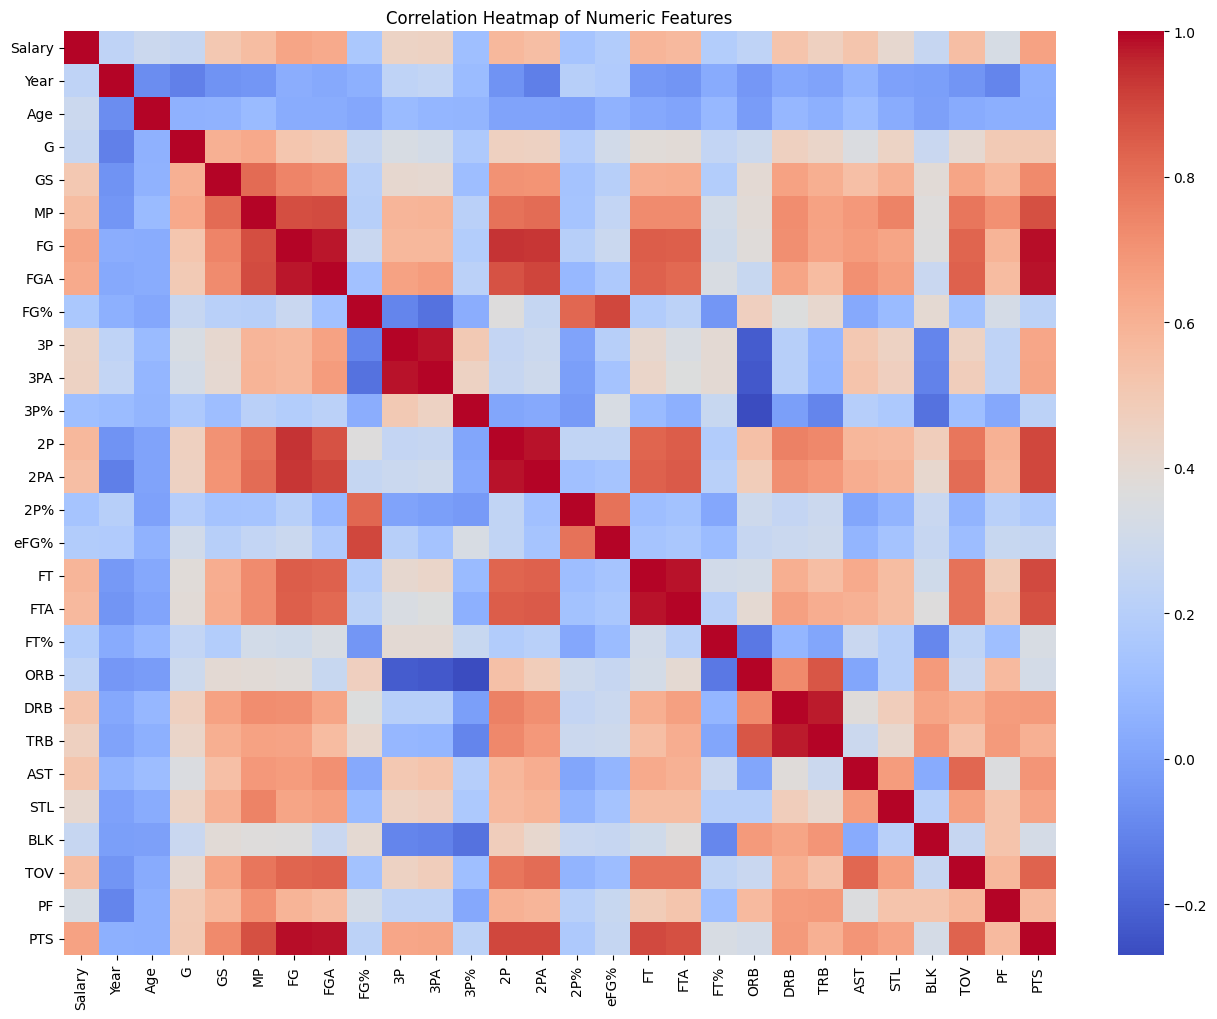

In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


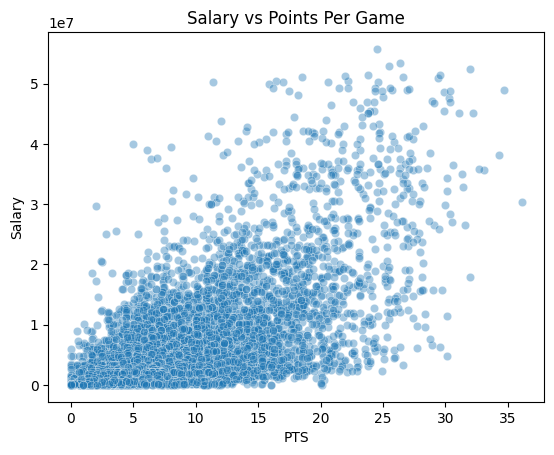

In [ ]:
sns.scatterplot(data=df, x="PTS", y="Salary", alpha=0.4)
plt.title("Salary vs Points Per Game")
plt.show()


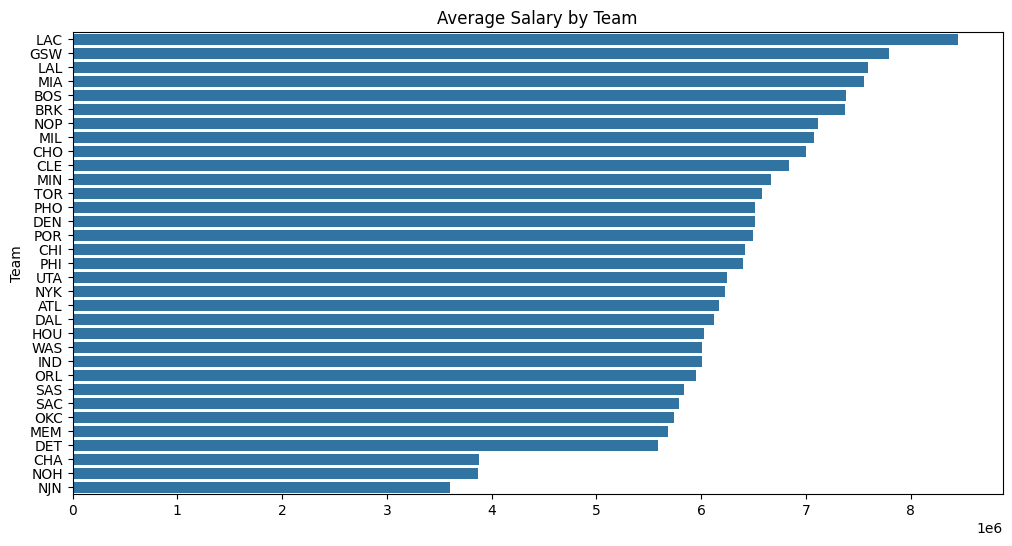

In [ ]:
team_salary = df.groupby("Team")["Salary"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=team_salary.values, y=team_salary.index)
plt.title("Average Salary by Team")
plt.show()


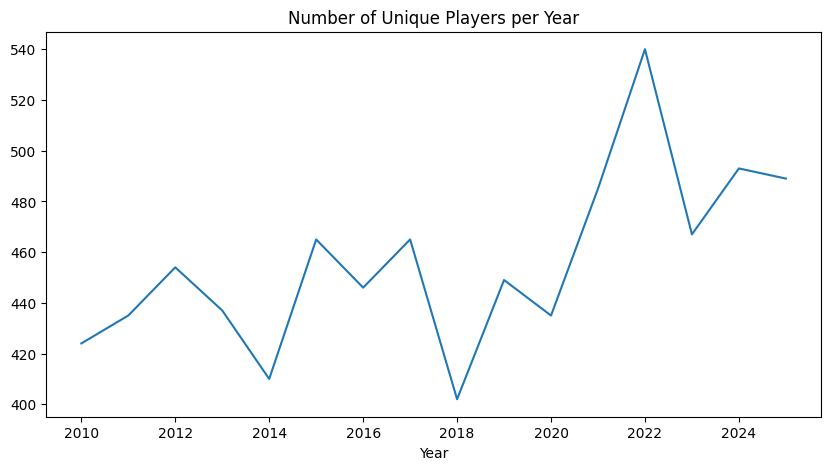

In [ ]:
players_per_year = df.groupby("Year")["Player"].nunique()

plt.figure(figsize=(10,5))
sns.lineplot(x=players_per_year.index, y=players_per_year.values)
plt.title("Number of Unique Players per Year")
plt.show()


In [ ]:
# Use 2020–2024 for training & feature selection
df_fs = df[df["Year"].between(2019, 2024)].copy()

target = "Salary"
X = df_fs.drop(columns=["Player", "Salary"])   # keep Year + Team as features
y = df_fs[target]

### Correlation Analysis

In [ ]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

corr = df_fs[numeric_cols.tolist() + ["Salary"]].corr()["Salary"].sort_values(ascending=False)
corr


Salary    1.000000
PTS       0.707722
FG        0.697228
FGA       0.684258
FT        0.659078
FTA       0.648868
2PA       0.648802
2P        0.642371
TOV       0.632642
MP        0.629363
AST       0.609021
GS        0.585527
DRB       0.568308
TRB       0.505645
STL       0.488301
3PA       0.484940
3P        0.484274
PF        0.388576
Age       0.375723
G         0.337089
BLK       0.293887
ORB       0.241394
FT%       0.206373
eFG%      0.154854
FG%       0.145526
3P%       0.137304
2P%       0.080166
Year      0.052854
Name: Salary, dtype: float64

D:\Users\oloya\AppData\Local\Temp\1\ipykernel_14452\1807125815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


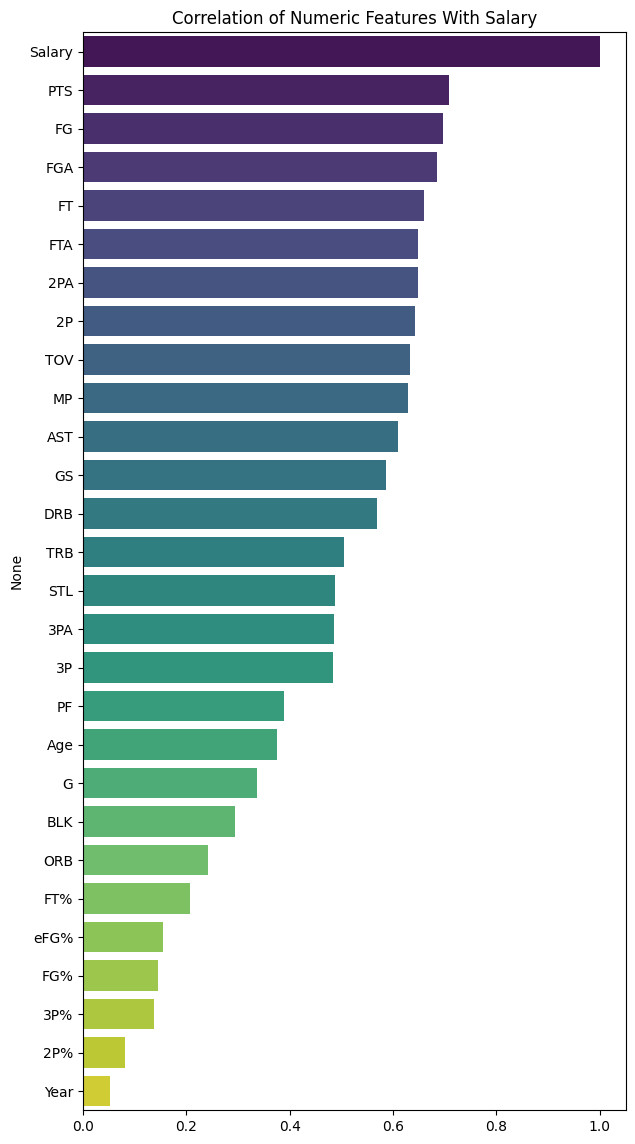

In [ ]:
plt.figure(figsize=(7,14))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Correlation of Numeric Features With Salary")
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer

# Take only numeric columns
numeric_X = X[numeric_cols].copy()

# 1. Impute missing values with the median for each column
imputer = SimpleImputer(strategy="median")
numeric_X_imputed = pd.DataFrame(
    imputer.fit_transform(numeric_X),
    columns=numeric_cols
)

# 2. Compute Mutual Information on the imputed data
mi_scores = mutual_info_regression(numeric_X_imputed, y, random_state=42)

mi = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=False)
mi


Year    0.399931
FG      0.392846
PTS     0.389196
MP      0.382925
TOV     0.365076
FGA     0.363629
GS      0.322120
FTA     0.316516
AST     0.308199
2PA     0.307733
FT      0.301628
G       0.300012
2P      0.288659
DRB     0.287859
TRB     0.249642
STL     0.221654
Age     0.204347
FT%     0.201767
PF      0.193606
3P      0.187870
3PA     0.179087
eFG%    0.150384
2P%     0.137082
FG%     0.134055
ORB     0.127026
BLK     0.113346
3P%     0.099025
dtype: float64

In [ ]:
numeric_X_imputed.isna().sum().sum()   # should print 0


np.int64(0)

D:\Users\oloya\AppData\Local\Temp\1\ipykernel_14452\2711969023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi.values, y=mi.index, palette="plasma")


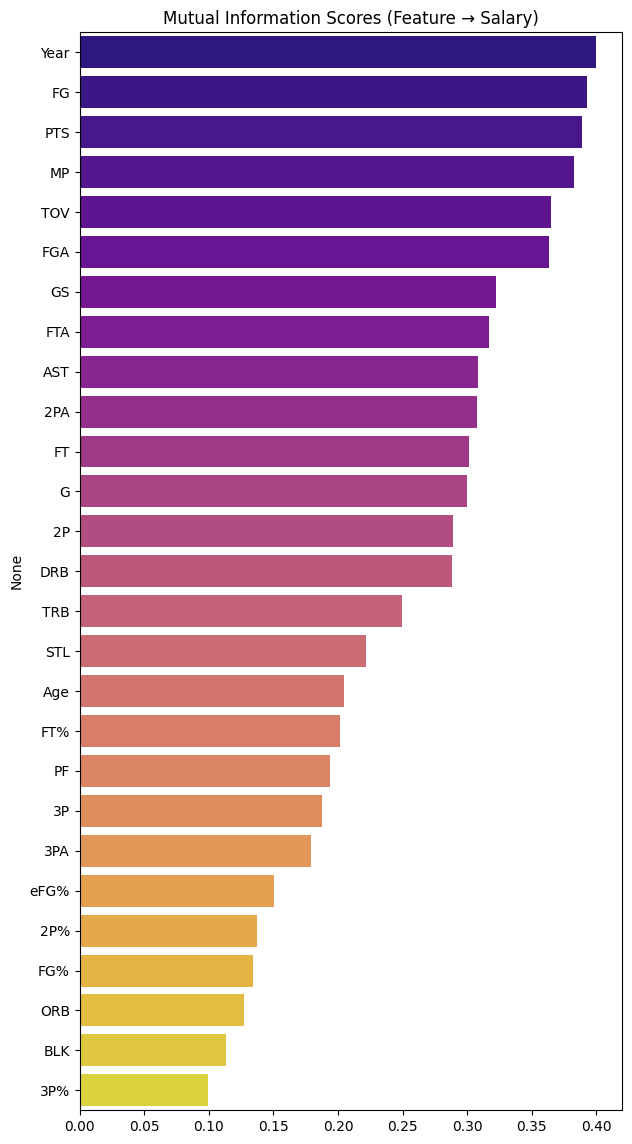

In [ ]:
plt.figure(figsize=(7,14))
sns.barplot(x=mi.values, y=mi.index, palette="plasma")
plt.title("Mutual Information Scores (Feature → Salary)")
plt.show()


# Feature Importance/Selection

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [ ]:
baseline_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        tree_method="hist",
        random_state=42
    ))
])

baseline_model.fit(X, y)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
model = baseline_model.named_steps["model"]
feature_names = baseline_model.named_steps["preprocess"].get_feature_names_out()

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

feat_imp.head(25)


,feature,importance
26,num__PTS,0.485481
4,num__MP,0.057306
1,num__Age,0.049933
5,num__FG,0.024104
16,num__FTA,0.023774
24,num__TOV,0.017930
51,cat__Team_GSW,0.014618
70,cat__Team_UTA,0.012884
3,num__GS,0.012428
21,num__AST,0.012313


D:\Users\oloya\AppData\Local\Temp\1\ipykernel_14452\3722453467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(20), x="importance", y="feature", palette="magma")


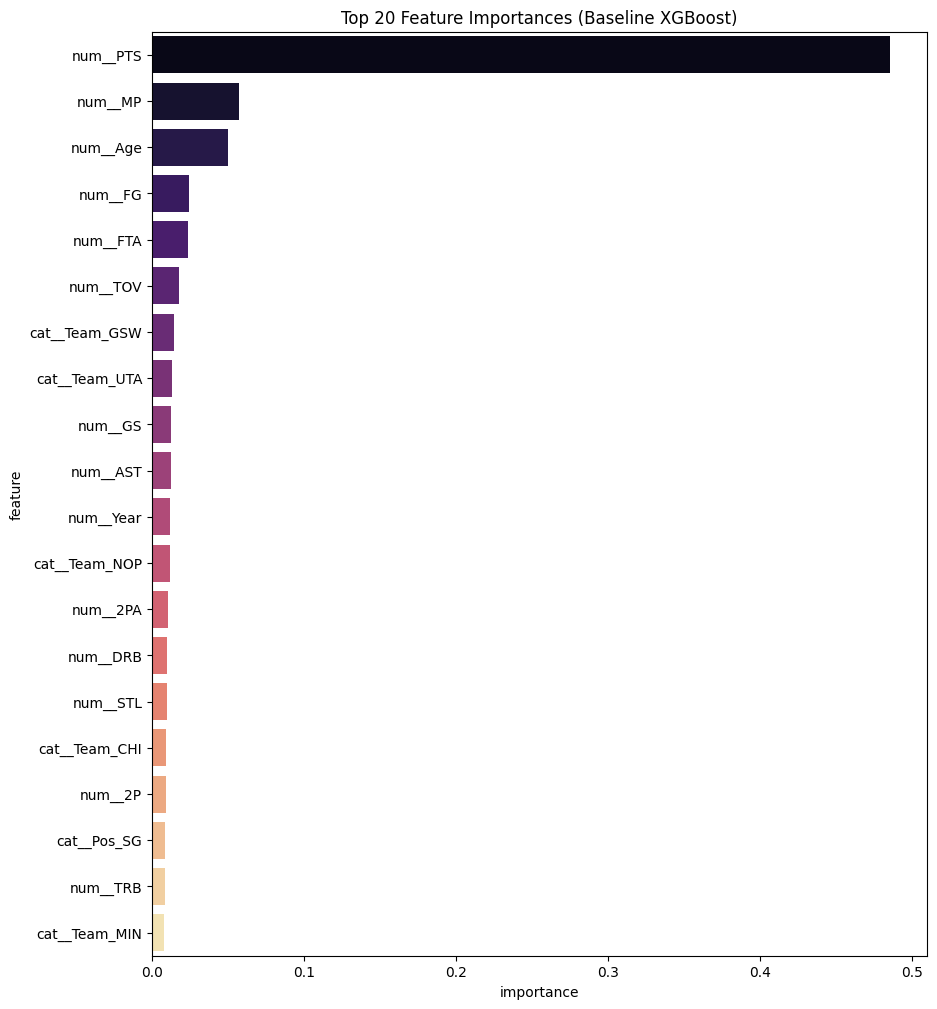

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(data=feat_imp.head(20), x="importance", y="feature", palette="magma")
plt.title("Top 20 Feature Importances (Baseline XGBoost)")
plt.show()


In [ ]:
final_features = [
    "PTS", "MP", "Age",
    "AST", "TOV",
    "2P", "2PA", "FGA",
    "FT", "FTA",
    "TRB", "DRB", "STL", "BLK",
    "G", "GS",
    "Year", "Team"
]


In [ ]:
# Filter for your training window 2019–2024
df_reg = df[df["Year"].between(2019, 2024)].copy()

target = "Salary"
final_features = [
    "PTS", "MP", "Age",
    "AST", "TOV",
    "2P", "2PA", "FGA",
    "FT", "FTA",
    "TRB", "DRB", "STL", "BLK",
    "G", "GS",
    "Year", "Team"
]

X = df_reg[final_features]
y = df_reg[target]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=2025
)

xgb_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_reg),
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)

# MSE → RMSE manually (for older sklearn versions)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R²:   {r2:.3f}")


RMSE: 4,971,291.04
MAE:  3,224,439.00
R²:   0.770


# Training Results

In [ ]:
# ---- TRAINING SET PREDICTIONS ----
y_pred_train = xgb_pipeline.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("=== TRAINING SET RESULTS ===")
print(f"RMSE (train): {rmse_train:,.2f}")
print(f"MAE (train):  {mae_train:,.2f}")
print(f"R² (train):   {r2_train:.3f}")


=== TRAINING SET RESULTS ===
RMSE (train): 796,492.15
MAE (train):  581,454.06
R² (train):   0.994


# Testing Results

In [ ]:
# ---- TEST SET RESULTS ----
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("=== TEST SET RESULTS ===")
print(f"RMSE (test): {rmse_test:,.2f}")
print(f"MAE (test):  {mae_test:,.2f}")
print(f"R² (test):   {r2_test:.3f}")


=== TEST SET RESULTS ===
RMSE (test): 4,971,291.04
MAE (test):  3,224,439.00
R² (test):   0.770


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_pipeline, X, y, cv=5, scoring="r2")
print(scores)
print("Mean R2:", scores.mean())


[0.4497298  0.57554317 0.75716615 0.75442207 0.7687788 ]
Mean R2: 0.6611279964447021


## Model Tuning - Feature Regularization

In [ ]:
xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    n_estimators=300,        # fewer trees
    learning_rate=0.05,
    max_depth=4,             # was 6
    min_child_weight=5,      # minimum samples per leaf
    subsample=0.8,
    colsample_bytree=0.7,    # less feature sampling -> less variance
    reg_lambda=1.0,          # L2 regularization
    reg_alpha=0.5,           # L1 regularization
    tree_method="hist",
    random_state=2025
)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)

    # Training predictions
    y_pred_train = pipeline.predict(X_train)
    rmse_train = (mean_squared_error(y_train, y_pred_train)) ** 0.5
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Testing predictions
    y_pred_test = pipeline.predict(X_test)
    rmse_test = (mean_squared_error(y_test, y_pred_test)) ** 0.5
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print("=== TRAINING RESULTS ===")
    print(f"RMSE Train: {rmse_train:,.2f}")
    print(f"MAE Train:  {mae_train:,.2f}")
    print(f"R² Train:   {r2_train:.3f}")
    print("")
    print("=== TESTING RESULTS ===")
    print(f"RMSE Test: {rmse_test:,.2f}")
    print(f"MAE Test:  {mae_test:,.2f}")
    print(f"R² Test:   {r2_test:.3f}")

    return {
        "rmse_train": rmse_train, "rmse_test": rmse_test,
        "mae_train": mae_train, "mae_test": mae_test,
        "r2_train": r2_train, "r2_test": r2_test
    }


In [ ]:
xgb_reg_A = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_lambda=1.0,
    reg_alpha=0.5,
    tree_method="hist",
    random_state=2025
)

pipeline_A = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_reg_A),
])

print("===== OPTION A RESULTS =====")
results_A = evaluate_model(pipeline_A, X_train, X_test, y_train, y_test)


===== OPTION A RESULTS =====
=== TRAINING RESULTS ===
RMSE Train: 3,080,141.62
MAE Train:  2,135,611.75
R² Train:   0.914

=== TESTING RESULTS ===
RMSE Test: 5,019,708.79
MAE Test:  3,305,130.75
R² Test:   0.766


## Model Tuning - Model Pruning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Reduced feature set
reduced_features = [
    "PTS", "MP", "Age",
    "AST", "TRB",
    "FT", "FTA",
    "STL", "BLK",
    "G", "GS",
    "Year", "Team"
]

X_red = df_reg[reduced_features]
y_red = df_reg["Salary"]

# 2. Train/test split for Option B
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_red, y_red, test_size=0.2, random_state=2025
)

# 3. NEW preprocessor for Option B (based ONLY on X_red)
numeric_features_B = X_red.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features_B = X_red.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer_B = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer_B = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_B = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_B, numeric_features_B),
        ("cat", categorical_transformer_B, categorical_features_B),
    ]
)

# 4. Use the same tuned XGBoost params from Option A
xgb_reg_A = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_lambda=1.0,
    reg_alpha=0.5,
    tree_method="hist",
    random_state=2025
)

pipeline_B = Pipeline([
    ("preprocess", preprocessor_B),
    ("model", xgb_reg_A),
])

print("===== OPTION B RESULTS =====")
results_B = evaluate_model(pipeline_B, X_train_B, X_test_B, y_train_B, y_test_B)


===== OPTION B RESULTS =====
=== TRAINING RESULTS ===
RMSE Train: 3,282,022.88
MAE Train:  2,242,452.50
R² Train:   0.902

=== TESTING RESULTS ===
RMSE Test: 5,001,714.35
MAE Test:  3,250,778.25
R² Test:   0.768


## Model Tuning - Hyperparameter Optimization (Optuna: 700 Trials) + Pruning

In [ ]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import optuna
import numpy as np

from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Identify numeric & categorical columns for this reduced feature set
numeric_features_B = X_red.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features_B = X_red.select_dtypes(include=["object", "category"]).columns.tolist()

def create_preprocessor_B():
    numeric_transformer_B = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer_B = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor_B = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer_B, numeric_features_B),
            ("cat", categorical_transformer_B, categorical_features_B),
        ]
    )
    return preprocessor_B


def objective(trial):
    # ----- Hyperparameter search space -----
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
    }

    xgb_model = xgb.XGBRegressor(
        objective="reg:squarederror",
        eval_metric="rmse",
        tree_method="hist",
        random_state=2025,
        **params
    )

    preprocessor_B = create_preprocessor_B()

    pipe = Pipeline([
        ("preprocess", preprocessor_B),
        ("model", xgb_model),
    ])

    # ----- 3-fold cross-validation -----
    kf = KFold(n_splits=3, shuffle=True, random_state=2025)

    rmses = []
    for train_idx, valid_idx in kf.split(X_red):
        X_train_cv, X_valid_cv = X_red.iloc[train_idx], X_red.iloc[valid_idx]
        y_train_cv, y_valid_cv = y_red.iloc[train_idx], y_red.iloc[valid_idx]

        pipe.fit(X_train_cv, y_train_cv)
        y_pred_cv = pipe.predict(X_valid_cv)

        mse = mean_squared_error(y_valid_cv, y_pred_cv)
        rmse = np.sqrt(mse)
        rmses.append(rmse)

    # Optuna will MINIMIZE the average RMSE
    return np.mean(rmses)


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=700, show_progress_bar=True)  # you can increase n_trials later

print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)


[I 2025-11-28 22:17:25,777] Trial 696 finished with value: 5111062.553205299 and parameters: {'n_estimators': 773, 'learning_rate': 0.012093145557146296, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6570252508960125, 'colsample_bytree': 0.8229782448060738, 'reg_lambda': 4.090428213234256, 'reg_alpha': 4.725425488292969}. Best is trial 638 with value: 5087488.653915541.


Best trial: 638. Best value: 5.08749e+06: 100%|█████████▉| 698/700 [21:55<00:04,  2.08s/it]

[I 2025-11-28 22:17:27,871] Trial 697 finished with value: 5111742.472677033 and parameters: {'n_estimators': 787, 'learning_rate': 0.01063665658860398, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.7023171428209812, 'colsample_bytree': 0.7812238474761669, 'reg_lambda': 3.843034226686525, 'reg_alpha': 4.81509349792367}. Best is trial 638 with value: 5087488.653915541.


Best trial: 638. Best value: 5.08749e+06: 100%|█████████▉| 699/700 [21:57<00:02,  2.07s/it]

[I 2025-11-28 22:17:29,903] Trial 698 finished with value: 5094265.7244632365 and parameters: {'n_estimators': 768, 'learning_rate': 0.010019336485241346, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6665348284898617, 'colsample_bytree': 0.7460379396188136, 'reg_lambda': 4.1617777413754995, 'reg_alpha': 4.663243922699403}. Best is trial 638 with value: 5087488.653915541.


Best trial: 638. Best value: 5.08749e+06: 100%|██████████| 700/700 [21:59<00:00,  1.89s/it]

[I 2025-11-28 22:17:31,856] Trial 699 finished with value: 5174297.089004166 and parameters: {'n_estimators': 774, 'learning_rate': 0.03468600411181375, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6456326616994331, 'colsample_bytree': 0.7460039347394766, 'reg_lambda': 3.651000935060327, 'reg_alpha': 4.607466651225553}. Best is trial 638 with value: 5087488.653915541.
Best RMSE: 5087488.653915541
Best params: {'n_estimators': 751, 'learning_rate': 0.01067836941609915, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.673245470439574, 'colsample_bytree': 0.7582060539509398, 'reg_lambda': 4.0165477099160105, 'reg_alpha': 4.617863328659557}


In [ ]:
best_params = study.best_params
print(best_params)

best_xgb = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    random_state=2025,
    **best_params
)

preprocessor_B = create_preprocessor_B()

best_pipeline = Pipeline([
    ("preprocess", preprocessor_B),
    ("model", best_xgb),
])


{'n_estimators': 751, 'learning_rate': 0.01067836941609915, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.673245470439574, 'colsample_bytree': 0.7582060539509398, 'reg_lambda': 4.0165477099160105, 'reg_alpha': 4.617863328659557}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_red, y_red, test_size=0.2, random_state=2025
)

best_pipeline.fit(X_train_B, y_train_B)

# Training
y_pred_train = best_pipeline.predict(X_train_B)
rmse_train = np.sqrt(mean_squared_error(y_train_B, y_pred_train))
mae_train = mean_absolute_error(y_train_B, y_pred_train)
r2_train = r2_score(y_train_B, y_pred_train)

# Testing
y_pred_test = best_pipeline.predict(X_test_B)
rmse_test = np.sqrt(mean_squared_error(y_test_B, y_pred_test))
mae_test = mean_absolute_error(y_test_B, y_pred_test)
r2_test = r2_score(y_test_B, y_pred_test)

print("=== TUNED MODEL RESULTS ===")
print(f"RMSE Train: {rmse_train:,.2f}")
print(f"MAE Train:  {mae_train:,.2f}")
print(f"R² Train:   {r2_train:.3f}")
print("")
print(f"RMSE Test:  {rmse_test:,.2f}")
print(f"MAE Test:   {mae_test:,.2f}")
print(f"R² Test:    {r2_test:.3f}")


=== TUNED MODEL RESULTS ===
RMSE Train: 2,658,661.74
MAE Train:  1,830,458.88
R² Train:   0.936

RMSE Test:  4,897,566.88
MAE Test:   3,148,870.50
R² Test:    0.777


In [ ]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
study.best_value


5087488.653915541

In [ ]:
optuna.visualization.plot_optimization_history(study)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 697, 698, 699],
              'y': [5265592.107078737, 5554446.834757178, 5275470.434680535, ...,
                    5111742.472677033, 5094265.7244632365, 5174297.089004166]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, ..., 697, 698, 699],
              'y': [5265592.107078737, 5265592.107078737, 5265592.107078737, ...,
                    5087488.653915541, 5087488.653915541, 5087488.653915541]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

# 1. Extract full training set
X_full = X_red  # reduced features from earlier
y_full = y_red

# 2. Rebuild the model with your Optuna parameters
best_xgb = xgb.XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    random_state=2025,
    **best_params    # <--- insert your optuna parameters here
)

# 3. Rebuild preprocessor
def create_preprocessor_B():
    numeric_transformer_B = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer_B = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    return ColumnTransformer(
        transformers=[
            ("num", numeric_transformer_B, numeric_features_B),
            ("cat", categorical_transformer_B, categorical_features_B),
        ]
    )

preprocessor_B = create_preprocessor_B()

# 4. Full pipeline
final_pipeline = Pipeline([
    ("preprocess", preprocessor_B),
    ("model", best_xgb),
])

# Fit on the full training period
final_pipeline.fit(X_full, y_full)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Predicted "fair" salary from the tuned model
df_reg["predicted_salary"] = final_pipeline.predict(X_full)


In [ ]:
df_reg["salary_gap"] = df_reg["Salary"] - df_reg["predicted_salary"]


# Classification Model Development

In [ ]:
def categorize_gap(gap, threshold=2_000_000):
    if gap <= -threshold:
        return "Underpaid"
    elif gap >= threshold:
        return "Overpaid"
    else:
        return "Fair"

df_reg["value_label"] = df_reg["salary_gap"].apply(categorize_gap)


In [ ]:
df_reg[["Player", "Team", "Year", "Salary", "predicted_salary", "salary_gap", "value_label"]].head(15)


,Player,Team,Year,Salary,predicted_salary,salary_gap,value_label
3940,Stephen Curry,GSW,2019,37457154,37132068.0,325086.0,Fair
3941,Chris Paul,HOU,2019,35654150,34380828.0,1273322.0,Fair
3942,LeBron James,LAL,2019,35654150,36591092.0,-936942.0,Fair
3943,Russell Westbrook,OKC,2019,35654150,35593972.0,60178.0,Fair
3944,Blake Griffin,DET,2019,32088932,31339036.0,749896.0,Fair
3945,Gordon Hayward,BOS,2019,31214295,17532234.0,13682061.0,Overpaid
3946,Kyle Lowry,TOR,2019,31200000,30955304.0,244696.0,Fair
3947,Paul George,OKC,2019,30560700,28914002.0,1646698.0,Fair
3948,Mike Conley,MEM,2019,30521115,30598682.0,-77567.0,Fair
3949,James Harden,HOU,2019,30421854,31074680.0,-652826.0,Fair


In [ ]:
df_reg["value_label"].value_counts()


value_label
Fair         1941
Underpaid     466
Overpaid      462
Name: count, dtype: int64

In [ ]:
df_reg.groupby("value_label")["salary_gap"].mean()


value_label
Fair        -2.965809e+05
Overpaid     4.912638e+06
Underpaid   -3.521197e+06
Name: salary_gap, dtype: float64

# Clustering Model

In [ ]:
cluster_features = [
    "PTS", "AST", "TRB", "STL", "BLK",
    "MP", "G", "GS",
    "FTA", "FT", "FGA", "3PA"
]


In [ ]:
df_cluster = df_reg.copy()

# Keep only numeric performance stats
X_cluster = df_cluster[cluster_features].copy()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_cluster_imputed = imputer.fit_transform(X_cluster)
X_cluster_scaled = scaler.fit_transform(X_cluster_imputed)


## Finding the Optimal K
#### Uning Elbow Method and Silhouette

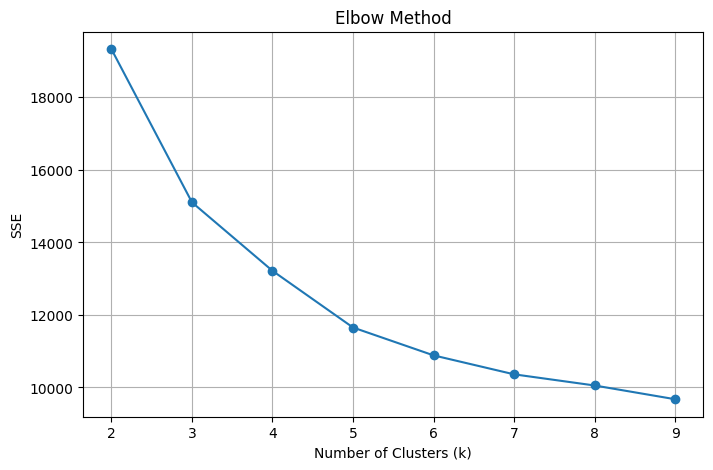

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=2025)
    km.fit(X_cluster_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()


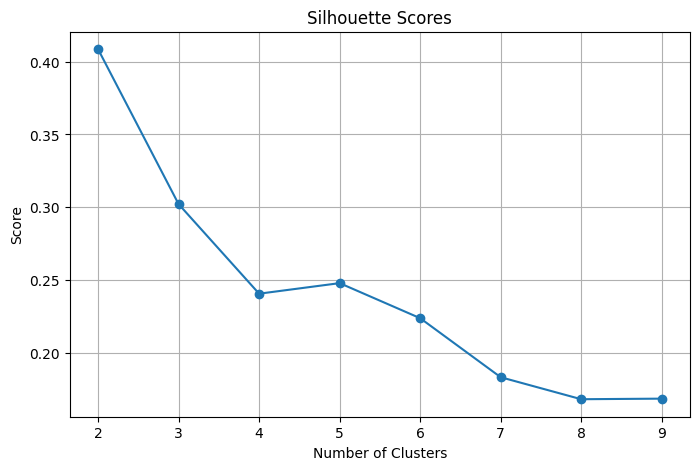

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=2025)
    labels = km.fit_predict(X_cluster_scaled)
    sil_scores.append(silhouette_score(X_cluster_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.grid(True)
plt.show()


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=2025)
df_cluster["cluster"] = kmeans.fit_predict(X_cluster_scaled)


In [ ]:
df_cluster.groupby("cluster")[cluster_features].mean().round(2)


,PTS,AST,TRB,STL,BLK,MP,G,GS,FTA,FT,FGA,3PA
cluster,,,,,,,,,,,,
0,2.85,0.67,1.63,0.26,0.18,8.75,20.45,0.89,0.58,0.40,2.59,1.06
1,12.87,3.16,4.19,0.93,0.39,28.72,63.47,45.30,2.17,1.74,10.56,4.72
2,6.85,1.55,3.19,0.58,0.36,18.32,52.53,10.28,1.21,0.90,5.65,2.47
3,11.89,1.72,8.03,0.72,1.26,26.01,60.23,44.17,2.78,1.93,8.53,1.46
4,23.01,5.56,6.22,1.12,0.55,33.96,61.75,60.46,5.66,4.62,17.23,5.80


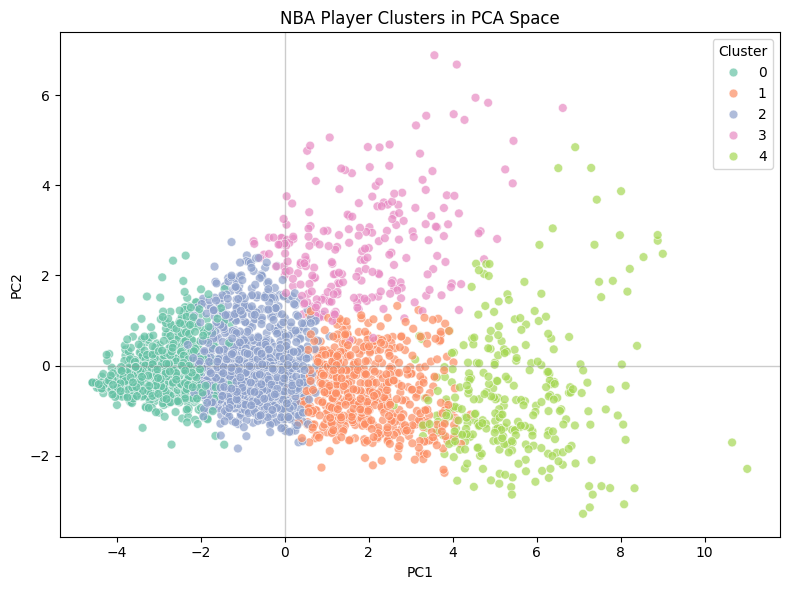

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 2D PCA
pca = PCA(n_components=2, random_state=2025)
X_pca = pca.fit_transform(X_cluster_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = df_cluster["cluster"].values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="cluster",
    palette="Set2",
    alpha=0.7,
    s=40
)

plt.title("NBA Player Clusters in PCA Space")
plt.axhline(0, color="grey", lw=1, alpha=0.4)
plt.axvline(0, color="grey", lw=1, alpha=0.4)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Model Cluster Visualizations

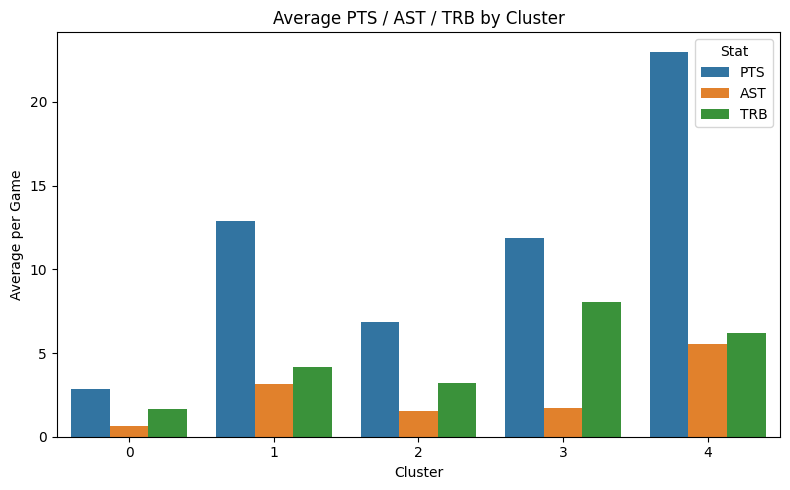

In [ ]:
summary = (
    df_cluster
    .groupby("cluster")[["PTS", "AST", "TRB"]]
    .mean()
    .reset_index()
)

summary_melt = summary.melt(
    id_vars="cluster",
    value_vars=["PTS", "AST", "TRB"],
    var_name="Stat",
    value_name="Average"
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=summary_melt,
    x="cluster", y="Average",
    hue="Stat"
)
plt.title("Average PTS / AST / TRB by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average per Game")
plt.legend(title="Stat")
plt.tight_layout()
plt.show()


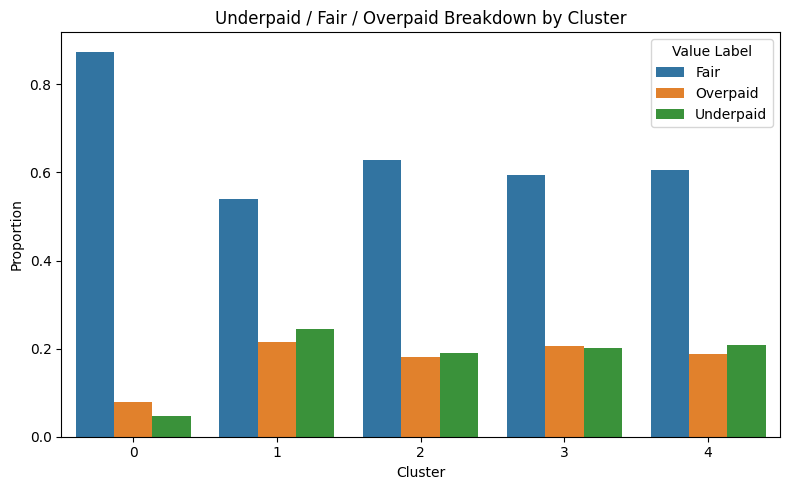

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: raw counts by cluster and value_label
val_counts = (
    df_reg
    .groupby(["cluster", "value_label"])
    .size()
    .reset_index(name="count")
)

# Step 2: convert counts to proportions within each cluster
val_counts["proportion"] = (
    val_counts["count"] /
    val_counts.groupby("cluster")["count"].transform("sum")
)

val_dist = val_counts  # same as old name

# Step 3: plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=val_dist,
    x="cluster", y="proportion",
    hue="value_label"
)
plt.title("Underpaid / Fair / Overpaid Breakdown by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.legend(title="Value Label")
plt.tight_layout()
plt.show()


## Merging Datasets Together

In [ ]:
df_reg["cluster"] = df_cluster["cluster"]

# Selecting Players from Each of the Identified Clusters

In [ ]:
new_representatives = {}

for c in sorted(df_reg["cluster"].unique()):
    
    # All players in the cluster
    cluster_players = (
        df_reg[df_reg["cluster"] == c]
        .groupby("Player")
        .size()
        .sort_values(ascending=False)
        .index
    )
    
    # Pick the first player that has 2024 data
    for p in cluster_players:
        if not df_reg[(df_reg["Player"] == p) & (df_reg["Year"] == 2024)].empty:
            new_representatives[c] = p
            break

new_representatives


{np.int32(0): 'Thanasis Antetokounmpo',
 np.int32(1): 'Buddy Hield',
 np.int32(2): 'Kenrich Williams',
 np.int32(3): 'Clint Capela',
 np.int32(4): 'Brandon Ingram'}

In [ ]:
# Use the new representatives
rep_players = list(new_representatives.values())
print("Representative players:", rep_players)

# Filter main data for only these players
df_reps = df_reg[df_reg["Player"].isin(rep_players)].copy()
df_reps = df_reps.sort_values(["Player", "Year"])

df_reps[["Player", "Year", "Salary", "predicted_salary", "salary_gap", "value_label", "cluster"]].head(50)


Representative players: ['Thanasis Antetokounmpo', 'Buddy Hield', 'Kenrich Williams', 'Clint Capela', 'Brandon Ingram']


,Player,Year,Salary,predicted_salary,salary_gap,value_label,cluster
4109,Brandon Ingram,2019,5757120,4944159.00,812961.00,Fair,4
4537,Brandon Ingram,2020,7265485,8795125.00,-1529640.00,Fair,4
4863,Brandon Ingram,2021,33251996,24924878.00,8327118.00,Overpaid,4
5340,Brandon Ingram,2022,34075017,31207562.00,2867455.00,Overpaid,4
5880,Brandon Ingram,2023,33558751,33695892.00,-137141.00,Fair,4
6345,Brandon Ingram,2024,34838724,33055718.00,1783006.00,Fair,4
4146,Buddy Hield,2019,3844760,8729852.00,-4885092.00,Underpaid,1
4566,Buddy Hield,2020,4861208,11451233.00,-6590025.00,Underpaid,1
4867,Buddy Hield,2021,30384192,23952050.00,6432142.00,Overpaid,1
5351,Buddy Hield,2022,26680677,21613778.00,5066899.00,Overpaid,1


In [ ]:
future_rows = []

for p in rep_players:
    row_2024 = df_reg[(df_reg["Player"] == p) & (df_reg["Year"] == 2024)]
    if row_2024.empty:
        print(f"No 2024 data for {p}, skipping...")
        continue

    X_2025 = row_2024[reduced_features].copy()

    # Adjust year and age for 2025 projection
    if "Year" in X_2025.columns:
        X_2025["Year"] = X_2025["Year"] + 1
    if "Age" in X_2025.columns:
        X_2025["Age"] = X_2025["Age"] + 1

    pred_2025 = final_pipeline.predict(X_2025)[0]

    future_rows.append({
        "Player": p,
        "Year": int(row_2024["Year"].iloc[0] + 1),
        "predicted_salary_2025": pred_2025
    })

df_future_2025 = pd.DataFrame(future_rows)
df_future_2025


,Player,Year,predicted_salary_2025
0,Thanasis Antetokounmpo,2025,4402794.0
1,Buddy Hield,2025,17726254.0
2,Kenrich Williams,2025,6435870.0
3,Clint Capela,2025,21917526.0
4,Brandon Ingram,2025,34582136.0


In [ ]:
df_reps_plot = df_reps.copy()

for _, r in df_future_2025.iterrows():
    df_reps_plot = pd.concat([
        df_reps_plot,
        pd.DataFrame({
            "Player": [r["Player"]],
            "Year": [r["Year"]],
            "Salary": [np.nan],  # unknown actual
            "predicted_salary": [r["predicted_salary_2025"]],
            "salary_gap": [np.nan],
            "value_label": ["Projected"],
            "cluster": [df_reg[df_reg["Player"] == r["Player"]]["cluster"].iloc[0]],
        })
    ], ignore_index=True)

df_reps_plot = df_reps_plot.sort_values(["Player", "Year"])


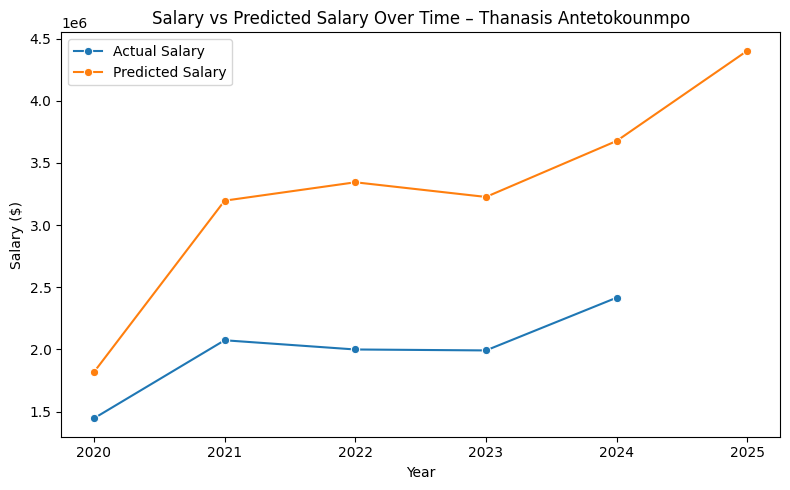

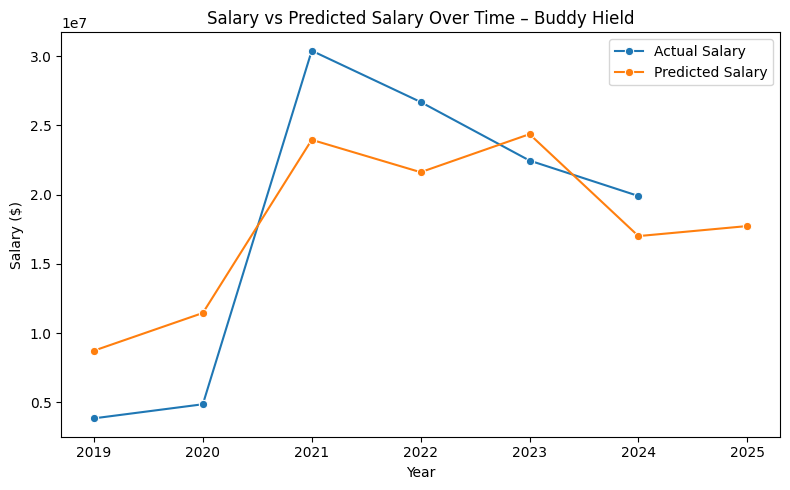

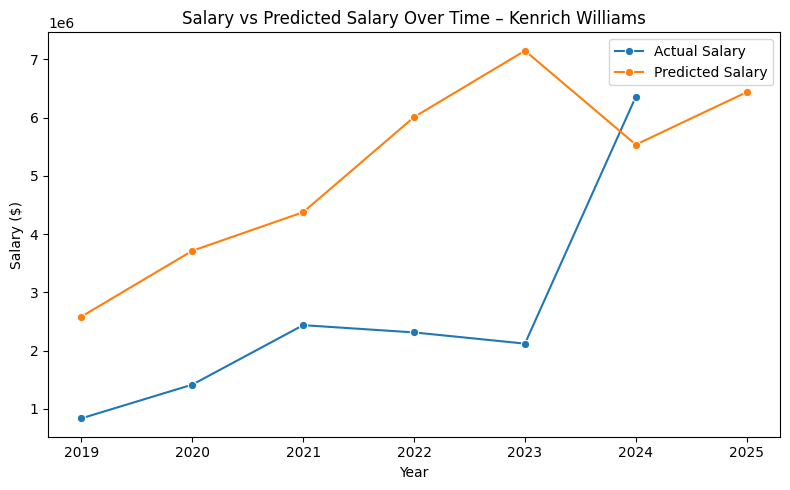

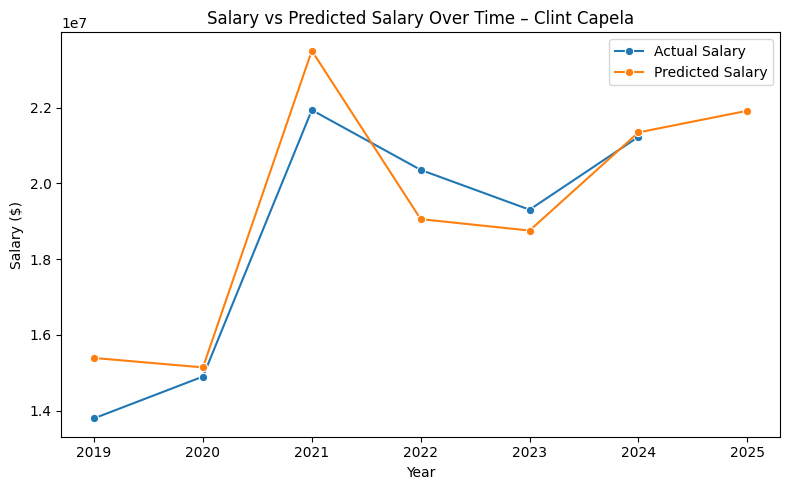

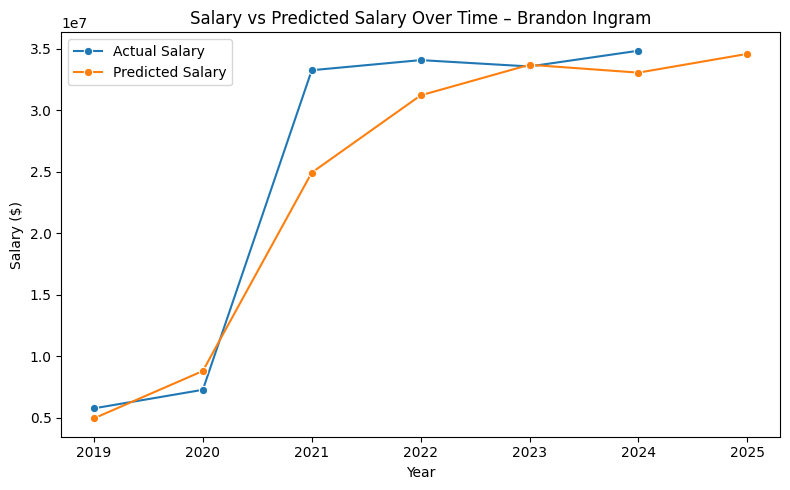

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for p in rep_players:
    tmp = df_reps_plot[df_reps_plot["Player"] == p]

    if tmp.empty:
        continue

    plt.figure(figsize=(8,5))

    # Actual salaries
    sns.lineplot(
        data=tmp, x="Year", y="Salary",
        marker="o", label="Actual Salary"
    )

    # Predicted salaries (incl. 2025)
    sns.lineplot(
        data=tmp, x="Year", y="predicted_salary",
        marker="o", label="Predicted Salary"
    )

    plt.title(f"Salary vs Predicted Salary Over Time – {p}")
    plt.ylabel("Salary ($)")
    plt.xlabel("Year")
    plt.xticks(sorted(tmp["Year"].unique()))
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Average salary_gap by cluster
df_reg.groupby("cluster")["salary_gap"].mean()

# Proportion underpaid/overpaid by cluster
df_reg.groupby("cluster")["value_label"].value_counts(normalize=True)


cluster  value_label
0        Fair           0.874543
         Overpaid       0.079172
         Underpaid      0.046285
1        Fair           0.539964
         Underpaid      0.245115
         Overpaid       0.214920
2        Fair           0.629049
         Underpaid      0.190178
         Overpaid       0.180773
3        Fair           0.593886
         Overpaid       0.205240
         Underpaid      0.200873
4        Fair           0.605351
         Underpaid      0.207358
         Overpaid       0.187291
Name: proportion, dtype: float64

# Predicting 2025 Player Cluster

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

cluster_features = [
    "PTS", "AST", "TRB", "STL", "BLK",
    "MP", "G", "GS",
    "FTA", "FT", "FGA", "3PA"
]

# rebuild preprocessing (must match your original clustering step)
imputer_c = SimpleImputer(strategy="median")
scaler_c = StandardScaler()

# fit only on historical data (2019-2024 only!)
X_cluster = df_reg[cluster_features]
X_cluster_imputed = imputer_c.fit_transform(X_cluster)
X_cluster_scaled = scaler_c.fit_transform(X_cluster_imputed)


In [ ]:
future_cluster_rows = []

for p in rep_players:
    row_2024 = df_reg[(df_reg["Player"] == p) & (df_reg["Year"] == 2024)]
    if row_2024.empty:
        continue

    X_2025 = row_2024[cluster_features].copy()

    if "Year" in X_2025.columns:
        X_2025["Year"] = X_2025["Year"] + 1
    if "Age" in X_2025.columns:
        X_2025["Age"] = X_2025["Age"] + 1

    future_cluster_rows.append({
        "Player": p,
        **X_2025.iloc[0].to_dict()
    })

df_2025_cluster = pd.DataFrame(future_cluster_rows)
df_2025_cluster


,Player,PTS,AST,TRB,STL,BLK,MP,G,GS,FTA,FT,FGA,3PA
0,Thanasis Antetokounmpo,0.9,0.5,0.4,0.2,0.1,4.6,34.0,0.0,0.1,0.0,0.9,0.0
1,Buddy Hield,12.1,2.8,3.2,0.8,0.5,25.7,84.0,42.0,0.7,0.6,10.1,6.8
2,Kenrich Williams,4.7,1.3,3.0,0.6,0.1,14.9,69.0,1.0,0.2,0.1,4.1,2.0
3,Clint Capela,11.5,1.2,10.6,0.6,1.5,25.8,73.0,73.0,2.8,1.8,8.5,0.0
4,Brandon Ingram,20.8,5.7,5.1,0.8,0.6,32.9,64.0,64.0,4.8,3.8,15.9,3.8


In [ ]:
X_2025_imputed = imputer_c.transform(df_2025_cluster[cluster_features])
X_2025_scaled = scaler_c.transform(X_2025_imputed)


# Predicted Clusters for 2025

In [ ]:
df_2025_cluster["predicted_cluster_2025"] = kmeans.predict(X_2025_scaled)
df_2025_cluster[["Player", "predicted_cluster_2025"]]


,Player,predicted_cluster_2025
0,Thanasis Antetokounmpo,0
1,Buddy Hield,1
2,Kenrich Williams,2
3,Clint Capela,3
4,Brandon Ingram,4


# Finished